In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [15]:
file_name = 'data_10Hz_labeled.csv'
target_maneuver = 1 # {0.0, 1.0, 3.0, 5.0, 6.0}
event_num = 5 

In [16]:
file_path = '../Data/'

df = pd.read_csv(file_path + file_name)
df

,Unnamed: 0,Var1,TimeStamp,TQI_TCU_INC,G_SEL_DISP,F_TCU,TCU_TYPE,TCU_OBD,SWI_GS,GEAR_TYPE,...,Speed,Heading,positionFix,pDOP,hAcc,timeFix,numSV,Distance,lateral_offset,maneuver
0,0,0,1.648695e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.036201,0.0
1,1,1,1.648695e+09,0.0,5.0,0.0,1.0,0.0,1.0,8.0,...,5.293720e+07,144.41330,1.0,14.0,9.0,1.0,16.0,0.55860,0.023580,3.0
2,2,2,1.648695e+09,0.0,5.0,0.0,1.0,0.0,1.0,8.0,...,5.296089e+07,145.16798,1.0,14.0,9.0,1.0,16.0,1.67605,0.016444,3.0
3,3,3,1.648695e+09,0.0,5.0,0.0,1.0,0.0,1.0,8.0,...,5.298458e+07,145.51950,1.0,14.0,9.0,1.0,16.0,2.79400,0.013939,3.0
4,4,4,1.648695e+09,0.0,5.0,0.0,1.0,0.0,1.0,8.0,...,5.288034e+07,145.33434,1.0,13.0,10.0,1.0,16.0,3.91110,0.015211,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54947,54947,54947,1.648701e+09,0.0,5.0,0.0,1.0,0.0,0.0,8.0,...,1.112430e+08,0.01079,1.0,16.0,6.0,1.0,16.0,54636.58049,-4.791561,6.0
54948,54948,54948,1.648701e+09,0.0,5.0,0.0,1.0,0.0,0.0,8.0,...,1.115794e+08,0.16694,1.0,16.0,6.0,1.0,16.0,54638.93458,0.000000,6.0
54949,54949,54949,1.648701e+09,0.0,5.0,0.0,1.0,0.0,0.0,8.0,...,1.112145e+08,0.12313,1.0,16.0,6.0,1.0,16.0,54641.28245,0.000000,6.0
54950,54950,54950,1.648701e+09,0.0,5.0,0.0,1.0,0.0,0.0,8.0,...,1.110061e+08,0.11534,1.0,16.0,6.0,1.0,16.0,54643.62559,0.000000,6.0


In [17]:
set(df.maneuver)

{0.0, 1.0, 3.0, 5.0, 6.0}

In [18]:
cat = df.maneuver

prev = 0 
maneuver_lst = []
for i in range(len(cat)):
    if prev != target_maneuver and cat[i] == target_maneuver:
        maneuver = [i]
    elif prev == target_maneuver and cat[i] == target_maneuver:
        maneuver.append(i)
    elif prev == target_maneuver and cat[i] != target_maneuver:
        maneuver_lst.append(maneuver)
    prev = cat[i]


In [19]:
def plot_ev(target_lst, df, event_num, standardize = True):

    ev_df = df.iloc[target_lst[event_num][0]:target_lst[event_num][-1]+1,:]
    
    if standardize:
        col = ev_df.columns
        scaler = StandardScaler()
        ev_df = scaler.fit_transform(ev_df)
        ev_df = pd.DataFrame(ev_df)
        ev_df.columns = col

    ## ev_df.TimeStampUnix or ev_df.TimeStamp

    plt.plot(ev_df.TimeStamp, ev_df.GyroZ, label = 'GyroZ')
    plt.plot(ev_df.TimeStamp, ev_df.AccelY, label = 'AccelY')
    # plt.plot(ev_df.TimeStamp, ev_df.SAS_Angle)
    plt.plot(ev_df.TimeStamp, ev_df.AccelX, label = 'AccelX')
    plt.legend()
    # plt.plot(ev_df.TimeStamp, ev_df.Speed)
    # plt.plot(ev_df.TimeStamp, ev_df.Heading)
    print(target_lst[event_num])

[11278, 11279, 11280, 11281, 11282, 11283, 11284, 11285, 11286, 11287, 11288, 11289]


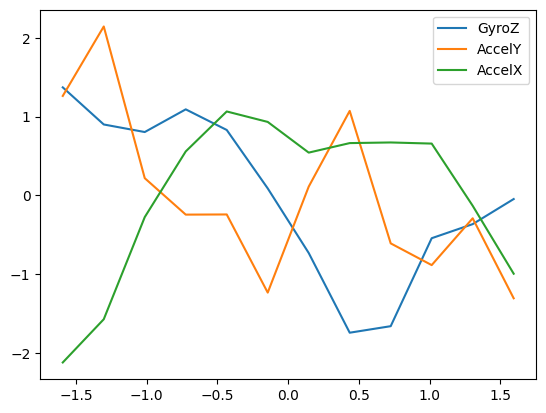

In [20]:
plot_ev(maneuver_lst,df ,event_num, standardize =True)